<a href="https://colab.research.google.com/github/RufinoMartin/Heart-Attack-Analysis-/blob/main/Heart_Attack_Analytics_%26_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

The analytics and visualizations developed in this notebook are a brief glimpse of what patients and doctors could use daily for treating Cardiac Patients more accurately. 

Doctors, with the help of medical devices, measure key health indicators, which in turn are organized, combined and analysed through a Data Pipeline. 

Potentially, treatments are boosted with immediate analytics, clear visuals that that keep the risk-patients aware, and machine learning models that help to predict outcomes, bringing even more caution and clarity to medical diagnoses and treatments. 

Author: Rufino Martin. Psychologist and Data Analyst. 

# Heart Attacks

- A heart attack (myocardial infarction or MI) is a serious medical emergency in which the supply of blood to the heart is suddenly blocked, usually by a blood clot (UK NHS).

**WHO:** 

- Cardiovascular diseases (CVDs) are the leading cause of death globally.
An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
- Over three quarters of CVD deaths take place in low- and middle-income countries.
- Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
- Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
- It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.


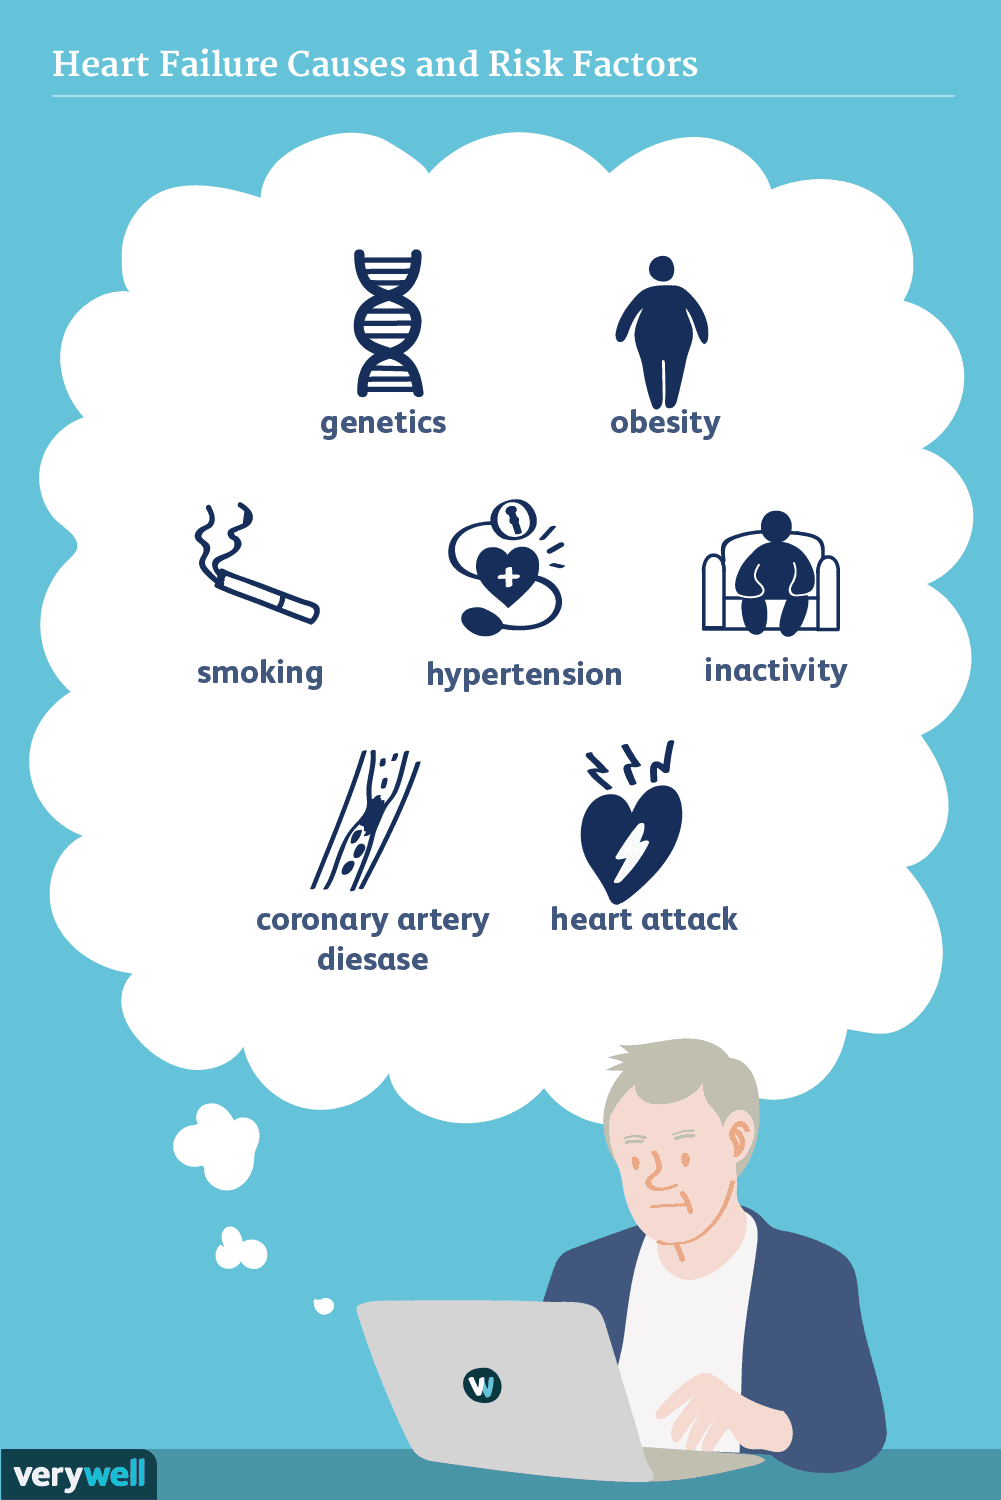

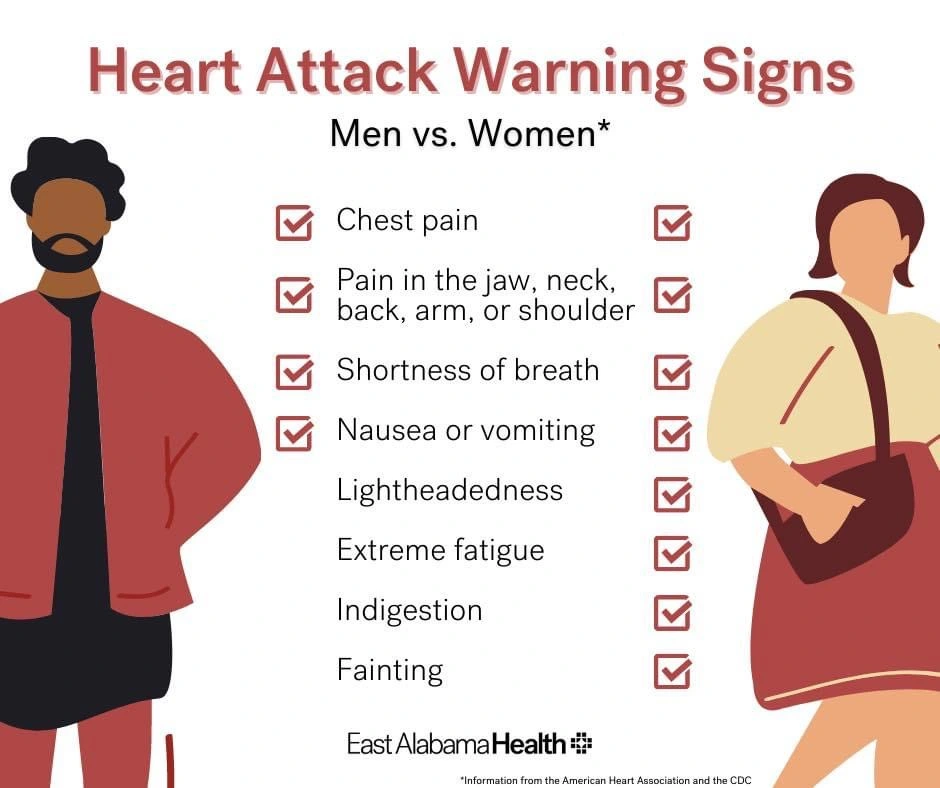

# Data Use Cases

With the increasing use of Data in Health Sector, Risk Factors can be more easily identified, thus making them subject for statistical tools analysis. Visualizations, statistical correlations and outcome predictions thanks to machine learning models can provide means to treat CVDs more rapidly and effectively. 


# Objectives

Using the UCI dataset, we analyse the CVDs causing variables, treating them as features. With a Exploratory Data Analysis we attain basic and advanced information on the features presence, distribution and correlation. The Outcome variable tells whether the registered patient has low or high chances of having a Heart Attack. Thanks to this registered data, we can also measure de incidence of the feature variables on the outcome or Target variable, thus opening the field of result prediction through machine learning models. 

The implications of this are big: high validated and trustable analytic frameworks and models can be implemented in HealthCare Infrastructures, offering fantastic tools to accelerate and strenghthen diagnoses, treatment and monitoring. 



## Questions to be answered

- To which extent does every isolated variable contribute as a risk factor?
- Which variables are, when correlated, highly responsible for a hear attack outcome?

# Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Import

The dataset, made available by the University of Califorinia, is extensively used to develop analytic tools and machine learning algorithms to help in heart treatment. 

- Original Publication: https://archive.ics.uci.edu/ml/datasets/heart+disease

- My Github Repository to fetch the RAW URL and run the notebook: 
https://github.com/RufinoMartin/Heart-Attack-Analysis-/blob/main/heart.csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Heart-Attack-Analysis-/main/heart.csv')

In [ ]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


## Data Dictionary


- age : Age of the patient.

- sex : Sex of the patient.

- cp : Chest pain type 
( 0 = Typical Angina / 1 = Atypical Angina / 2 = Non-anginal Pain / 3 = Asymptomatic )

- trtbps : Resting blood pressure (in mm Hg).

- chol : Cholestoral in mg/dl fetched via BMI sensor.

- fbs : fasting blood sugar > 120 mg/dl
 ( 1 = True / 0 = False )

- restecg : Resting electrocardiographic results 
( 0 = Normal / 1 = ST-T wave normality / 2 = Left ventricular hypertrophy )

- thalachh : Maximum heart rate achieved.

- oldpeak : Previous peak.

- slp : Slope of the peak exercise (in ST segment: Up, flat, down)

- caa : Number of major vessels (0–3) colored by fluoroscopy

- thall : Thalium Stress Test result (Normal, fixed defect, reversible defect) ~ (0,3).

- exng : Exercise-induced Angina 
( 1 = Yes / 0 = No )

- output : Target variable = Heart attack chance.


We proceed to rename columns:

In [ ]:
df.rename(columns={'age':'Age',	'sex':'Sex',	'cp':'ChestPainType',	'trtbps':'RestingBloodPressure',	'chol':'Cholestoral',	
                   'fbs':'FastingBloodSugar',	'restecg':'RestElectro', 'thalachh':'MaxHeartRate',	'exng':'ExerciseAngina',
                   'oldpeak':'PreviousPeak',	'slp':'Slope',	'caa':'MajorVessels',	'thall':'ThaliumStress',	'output':'Output'}, inplace=True)

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholestoral',
       'FastingBloodSugar', 'RestElectro', 'MaxHeartRate', 'ExerciseAngina',
       'PreviousPeak', 'Slope', 'MajorVessels', 'ThaliumStress', 'Output'],
      dtype='object')

# Data Understanding

In [ ]:
print("The shape of the dataframe (rows, columns) is : " , df.shape)


The shape of the dataframe (rows, columns) is :  (303, 14)


In [ ]:
# Basic descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
ChestPainType,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
FastingBloodSugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestElectro,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
ExerciseAngina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
PreviousPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
print("There are null values in this dataset: ", df.isnull().values.any())

# Not null values. 

There are null values in this dataset:  False


In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["Unique Values Counted"]).transpose()

,Unique Values Counted
Age,41
Sex,2
ChestPainType,4
RestingBloodPressure,49
Cholestoral,152
FastingBloodSugar,2
RestElectro,3
MaxHeartRate,91
ExerciseAngina,2
PreviousPeak,40


Making a manual reminder and separation of categorical and constant variables

In [ ]:
catergorical_cols = ['Sex','ExerciseAngina','MajorVessels','ChestPainType','FastingBloodSugar','RestElectro','Slope','ThaliumStress']
constant_cols = ["Age","RestingBloodPressure","Cholestoral","MaxHeartRate","PreviousPeak"]
target_col = ["Output"]
print("The categorial columnss are : ", catergorical_cols)
print("The continuous columnss are : ", constant_cols)
print("The target variable is :  ", target_col)

The categorial columnss are :  ['Sex', 'ExerciseAngina', 'MajorVessels', 'ChestPainType', 'FastingBloodSugar', 'RestElectro', 'Slope', 'ThaliumStress']
The continuous columnss are :  ['Age', 'RestingBloodPressure', 'Cholestoral', 'MaxHeartRate', 'PreviousPeak']
The target variable is :   ['Output']


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Categorical Variables

findfont: Font family ['baskerville'] not found. Falling back to DejaVu Sans.
findfont: Font family ['baskerville'] not found. Falling back to DejaVu Sans.


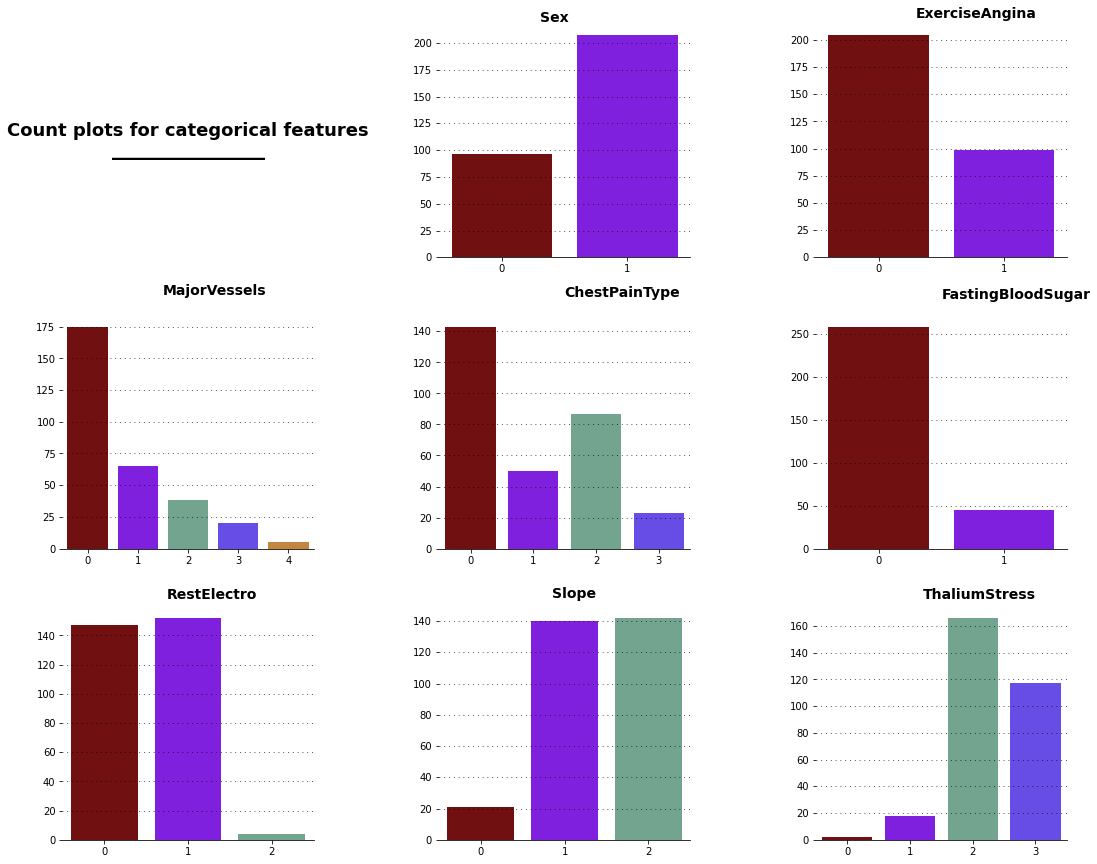

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plots for categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='baskerville',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='Sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# ExerciseAngina count
ax2.text(0.3, 220, 'ExerciseAngina', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='ExerciseAngina',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# MajorVessels count
ax3.text(1.5, 200, 'MajorVessels' , fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='MajorVessels',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# ChestPainType count
ax4.text(1.5, 162, 'ChestPainType', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='ChestPainType',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# FastingBloodSugar count
ax5.text(0.5, 290, 'FastingBloodSugar', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='FastingBloodSugar',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# RestElectro count
ax6.text(0.75, 165, 'RestElectro', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='RestElectro',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slope count
ax7.text(0.85, 155, 'Slope', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='Slope',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# ThaliumStress count
ax8.text(1.2, 180, 'ThaliumStress', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='ThaliumStress',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### Continuous Variables

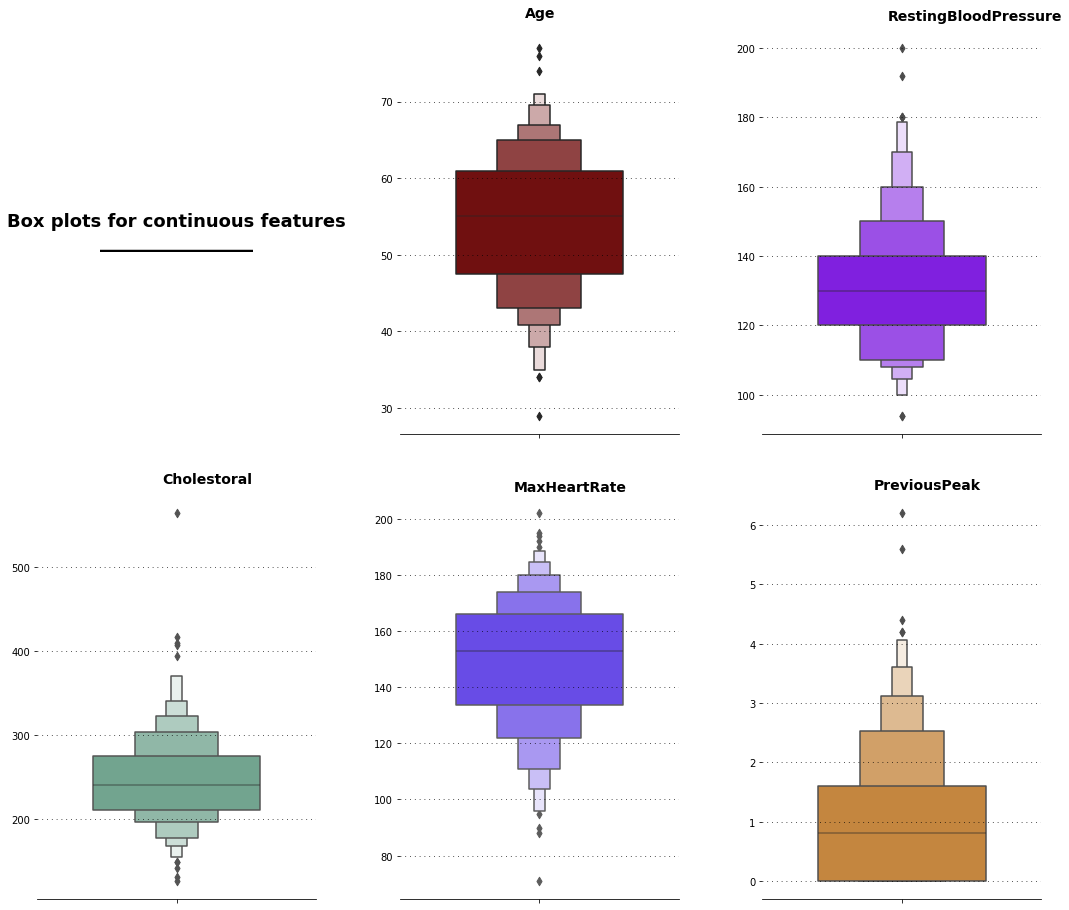

In [ ]:
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]


# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Box plots for continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='baskerville',
         color="#000000")

# Age 
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# RestingBloodPressure 
ax2.text(-0.05, 208, 'RestingBloodPressure', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['RestingBloodPressure'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Cholestoral
ax3.text(-0.05, 600, 'Cholestoral', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['Cholestoral'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# MaxHeartRate 
ax4.text(-0.09, 210, 'MaxHeartRate', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['MaxHeartRate'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# PreviousPeak 
ax5.text(-0.1, 6.6, 'PreviousPeak', fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['PreviousPeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

### Target Variable

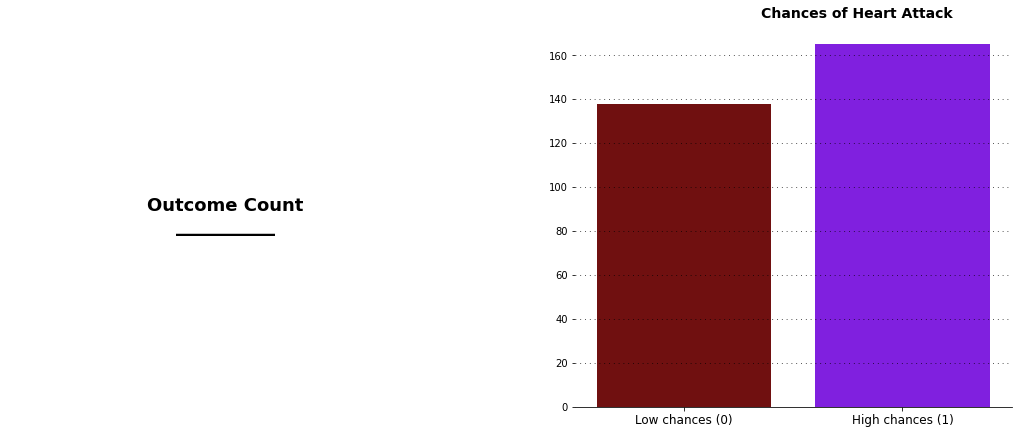

In [ ]:

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"] 

# Title of the plot
ax0.text(0.5,0.5,"Outcome Count\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Output Count
ax1.text(0.35,177,"Chances of Heart Attack",fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'Output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Low chances (0)","High chances (1)"], fontsize=12)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

## Bivariate Analysis

### Continuous Variables Heatmap

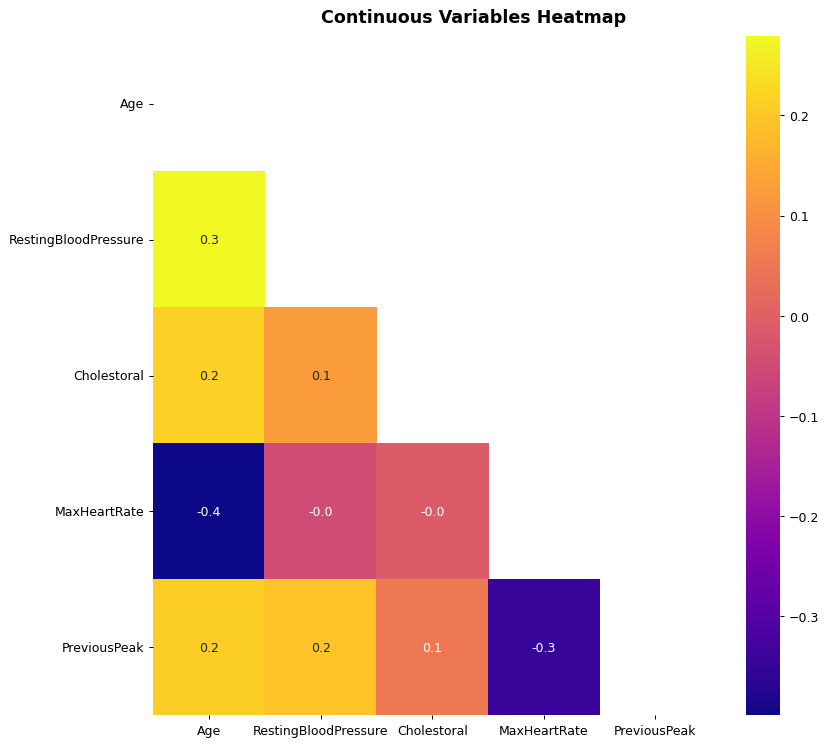

In [ ]:
df_corr = df[constant_cols].corr().transpose()


fig = plt.figure(dpi = 90, figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["plasma"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Continuous Variables Heatmap",fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")
df_corr = df[constant_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='plasma')
plt.yticks(rotation = 0)
plt.show()

### Full Heatmap

Text(0.5, 1.0, 'Full Heatmap')

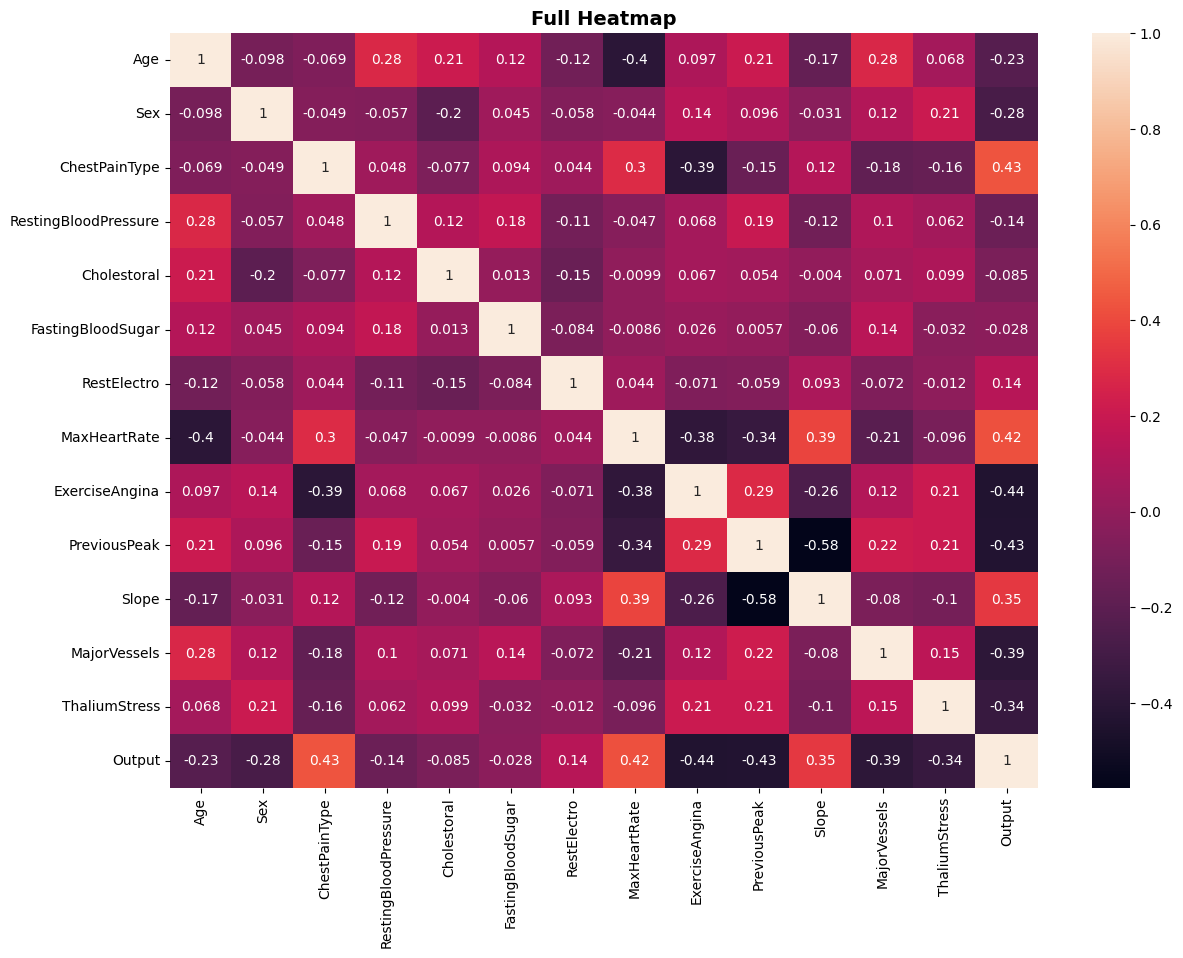

In [ ]:
plt.figure(dpi=100, figsize=(14, 10))

heatmap_test = df.corr()
sns.heatmap(heatmap_test, 
            xticklabels = heatmap_test.columns.values,
            yticklabels = heatmap_test.columns.values,
            annot = True);
plt.title('Full Heatmap',fontsize=14, fontweight='bold', fontfamily='baskerville', color="#000000")


Distribution of continuous features according to target variable

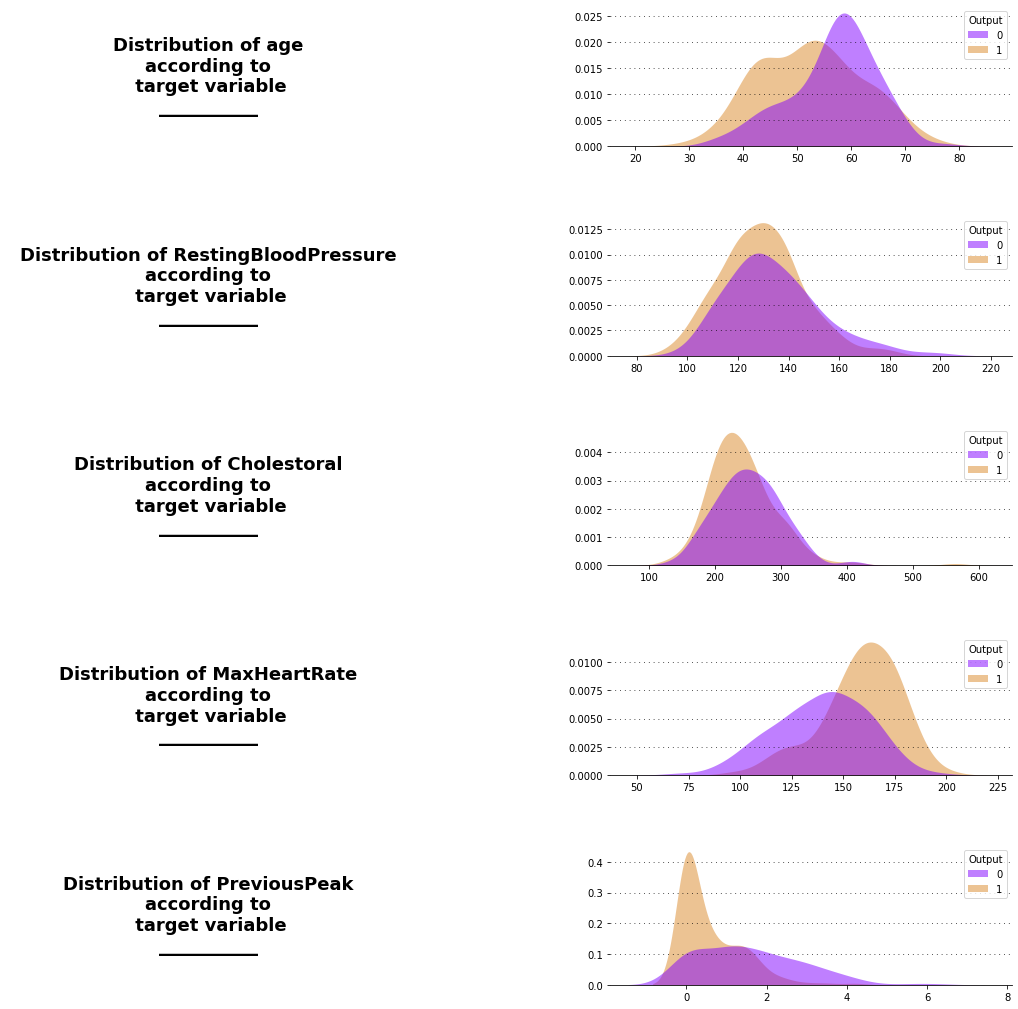

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]


# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='Age',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# RestingBloodPressure title
ax2.text(0.5,0.5,"Distribution of RestingBloodPressure\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# RestingBloodPressure
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='RestingBloodPressure',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cholestoral title
ax4.text(0.5,0.5,"Distribution of Cholestoral\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Cholestoral
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='Cholestoral',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# MaxHeartRate title
ax6.text(0.5,0.5,"Distribution of MaxHeartRate\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# MaxHeartRate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='MaxHeartRate',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# PreviousPeak title
ax8.text(0.5,0.5,"Distribution of PreviousPeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# PreviousPeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='PreviousPeak',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### More Key Relations

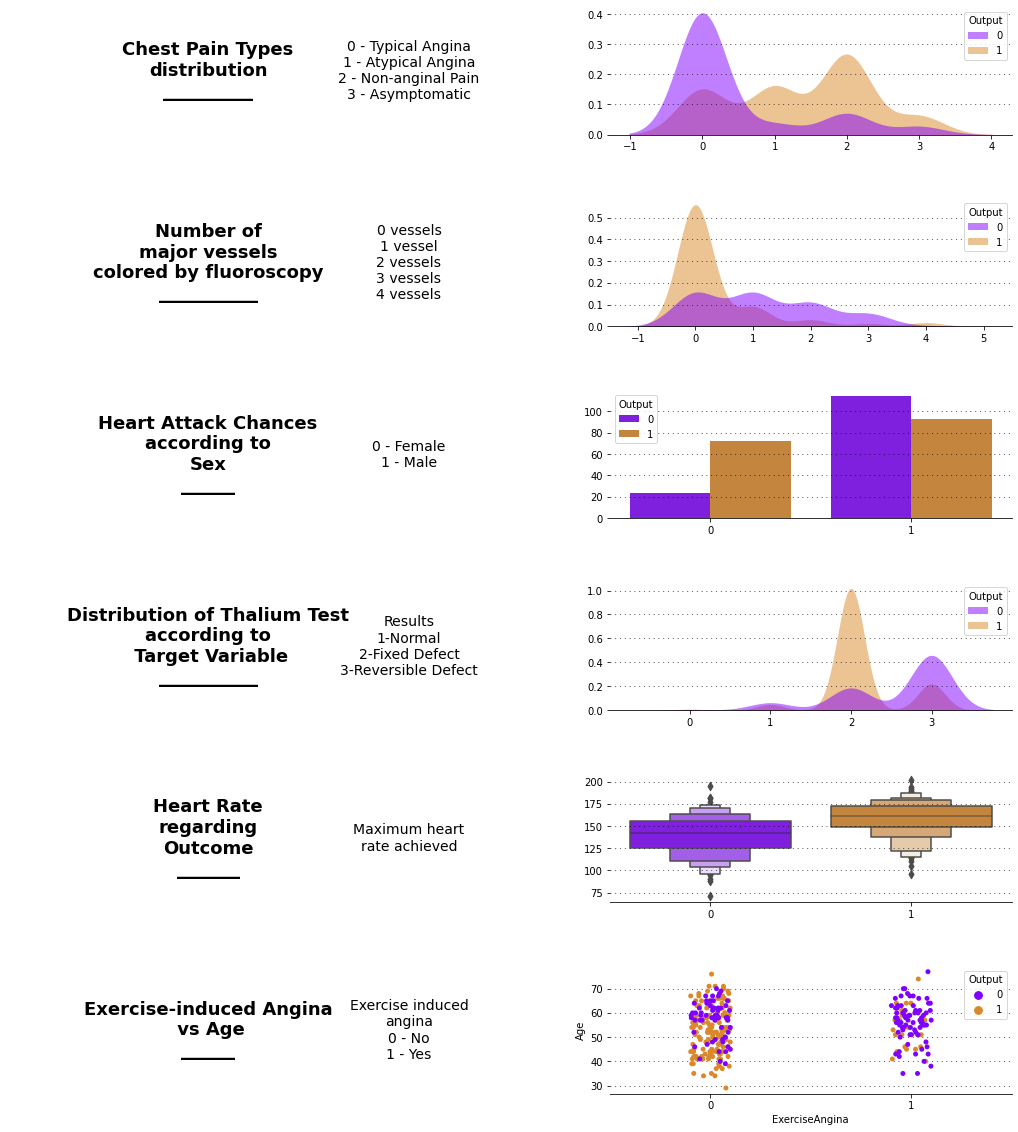

In [ ]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# ChestPainType title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest Pain Types\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# ChestPainType
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='ChestPainType',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# MajorVessels title
ax2.text(0.5,0.5,"Number of\nmajor vessels\ncolored by fluoroscopy\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4 vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# MajorVessels
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='MajorVessels',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack Chances\naccording to\nSex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='Sex',palette=["#8000ff","#da8829"], hue='Output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# ThaliumStress title
ax6.text(0.5,0.5,"Distribution of Thalium Test\naccording to\n Target Variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax6.text(1,.5,"Results\n1-Normal\n2-Fixed Defect\n3-Reversible Defect",  
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# ThaliumStress
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='ThaliumStress',hue="Output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# MaxHeartRate title
ax8.text(0.5,0.5,"Heart Rate\nregarding\nOutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# MaxHeartRate
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='Output',y='MaxHeartRate',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# ExerciseAngina title
ax10.text(0.5,0.5,"Exercise-induced Angina\n vs Age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='baskerville',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# ExerciseAngina
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='ExerciseAngina',y='Age',hue='Output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)